In [1]:
%matplotlib inline


# Swissroll plot

## Manel Soler Sanz
An illustration of Swiss Roll reduction
with locally linear embedding


Computing LLE embedding
Computing Isomap embedding
Computing MDS embedding


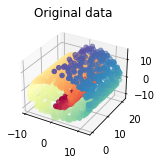

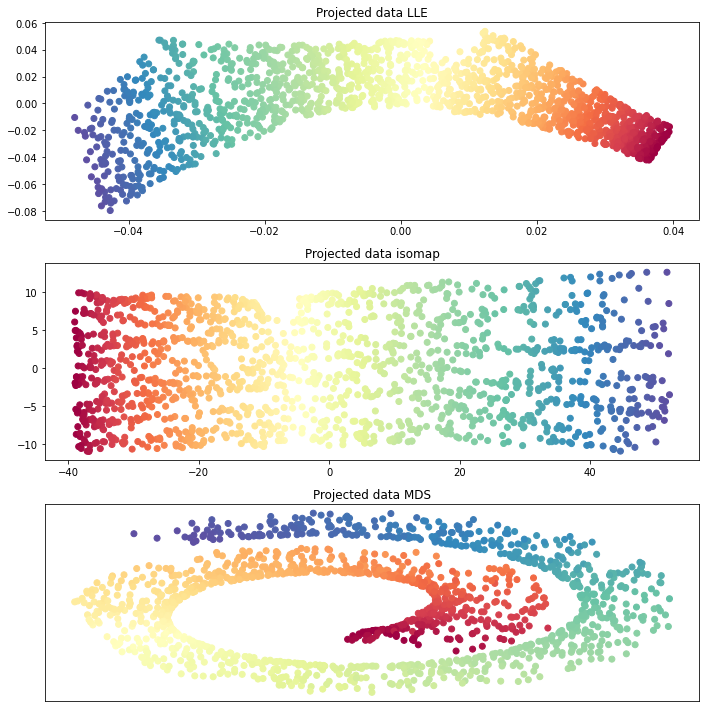

In [2]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.manifold import Isomap
from sklearn.manifold import MDS

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

# ----------------------------------------------------------------------
# Swiss roll

from sklearn import manifold, datasets

X, color = datasets.make_swiss_roll(n_samples=1500)

# ----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

print("Computing LLE embedding")

#embedding_lle = manifold.LocallyLinearEmbedding(n_neighbors=12, n_components=2)
#X_lle = embedding_lle.fit_transform(X)

X_lle,x_err = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)

# ----------------------------------------------------------------------
# Isomap of the swiss roll

print("Computing Isomap embedding")

embedding = Isomap(n_components=2,n_neighbors=12)
X_isomap = embedding.fit_transform(X)

# ----------------------------------------------------------------------
# MDS of the swiss roll

print("Computing MDS embedding")

mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

# -----------------------------------------------------------------------

# Plot result


fig = plt.figure()
ax = fig.add_subplot(211, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
fig.tight_layout()


fig, ax = plt.subplots(3, 1,figsize=(10,10))
#ax = fig.add_subplot(212)
ax[0].scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis("tight")
plt.xticks([]), plt.yticks([])
ax[0].set_title("Projected data LLE")

#ax = fig.add_subplot(222)
ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis("tight")
plt.xticks([]), plt.yticks([])
ax[1].set_title("Projected data isomap")

ax[2].scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis("tight")
plt.xticks([]), plt.yticks([])
ax[2].set_title("Projected data MDS")


fig.tight_layout()



In [3]:
import numpy as np
print(np.shape(X_mds))
print(np.shape(X_isomap))
np.shape(X_lle)



(1500, 2)
(1500, 2)


(1500, 2)

Comenta los siguientes puntos:

     1)¿Qué algoritmo de manifold NO LINEAL realiza una representación más próxima a la real?
     

El algoritmo no lineal que realiza una representación más próxima a la real es el isomap porque respeta las distancias entre puntos de una de las dimensiones. LLE por lo contrario se va  estrechandp

     2)¿Por qué la representación de MDS es tan diferente a la del resto?

Los otros dos metodos solo toman en cuenta una vencindad de puntos o la distancia geodésica entre ellos para representar cada punto en un nuevo espacio de representacion, por lo que raramente se conserva la forma. En cambio MSD tiene como objetivo conservar las distancias euclideas entre puntos, por lo que la forma se mantiene

    3) Modifica el número de vecinos y compara los resultados

* Vamos a cambiare el número de vecinos a 5 y 50

Computing Isomap embedding
Computing MDS embedding
Computing Isomap embedding
Computing MDS embedding
Computing Isomap embedding
Computing MDS embedding


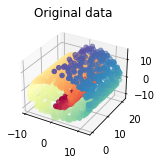

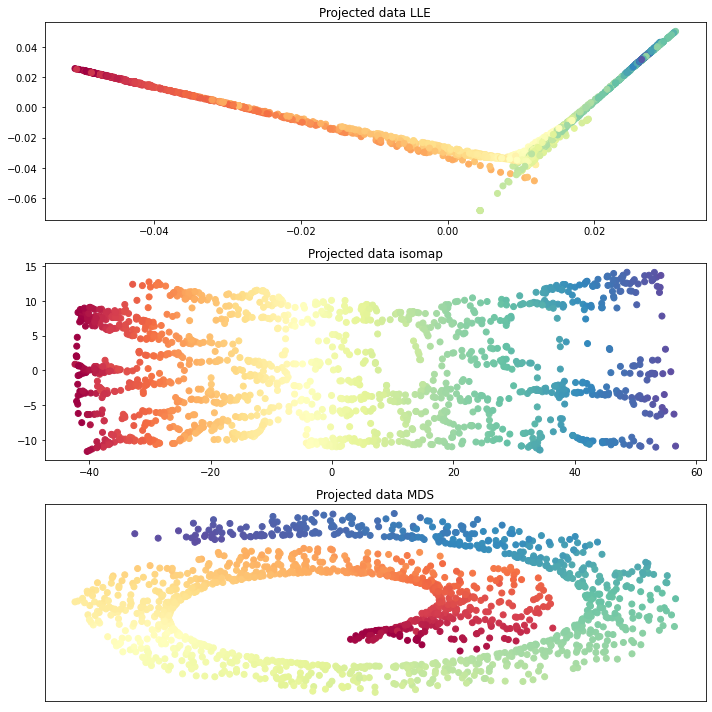

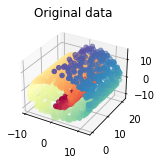

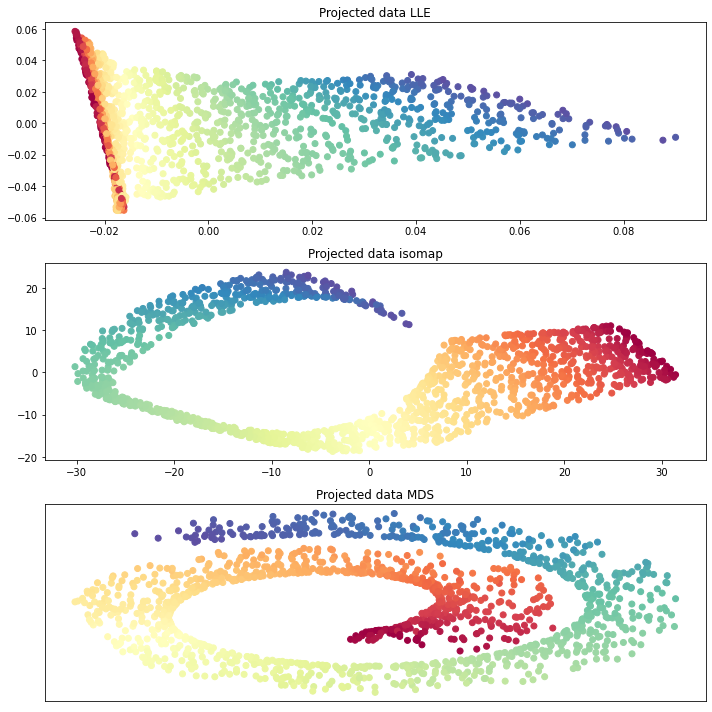

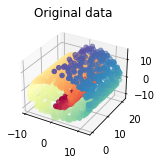

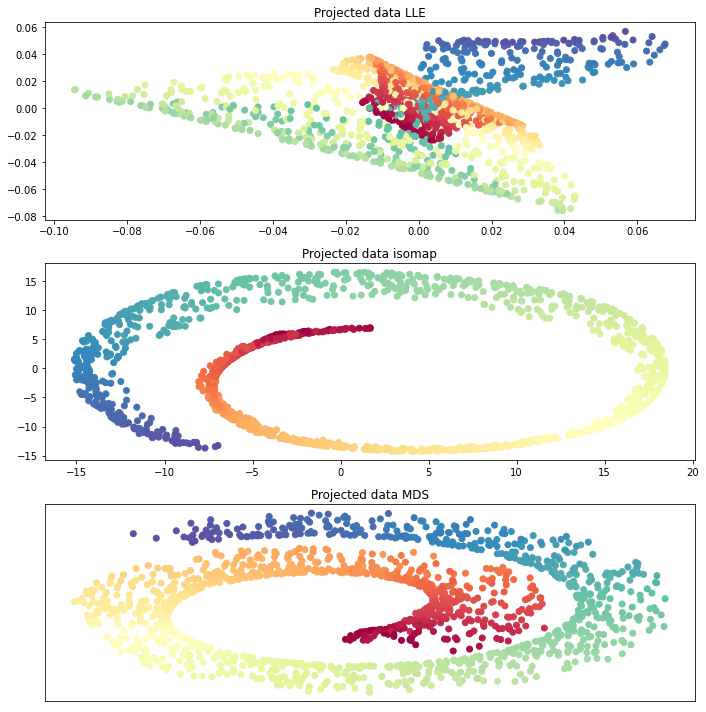

In [7]:

num = [5,20,50]

for n in num :
    
    X_lle,x_err = manifold.locally_linear_embedding(X, n_neighbors=n, n_components=2)

    # ----------------------------------------------------------------------
    # Isomap of the swiss roll

    print("Computing Isomap embedding")

    embedding = Isomap(n_components=2,n_neighbors=n)
    X_isomap = embedding.fit_transform(X)

    # ----------------------------------------------------------------------
    # MDS of the swiss roll

    print("Computing MDS embedding")

    # mds lo mantenemos

    #mds = MDS(n_components=2)
    #X_mds = mds.fit_transform(X)

    # -----------------------------------------------------------------------

    # Plot result


    fig = plt.figure()
    ax = fig.add_subplot(211, projection="3d")
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

    ax.set_title("Original data")
    fig.tight_layout()


    fig, ax = plt.subplots(3, 1,figsize=(10,10))
    #ax = fig.add_subplot(212)
    ax[0].scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.axis("tight")
    plt.xticks([]), plt.yticks([])
    ax[0].set_title("Projected data LLE")

    #ax = fig.add_subplot(222)
    ax[1].scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.axis("tight")
    plt.xticks([]), plt.yticks([])
    ax[1].set_title("Projected data isomap")

    ax[2].scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.axis("tight")
    plt.xticks([]), plt.yticks([])
    ax[2].set_title("Projected data MDS")


    fig.tight_layout()

**PARA 5 vecinos**
Vemos que en el isomap : el valor bajo de k provoca  islas aisladas dentro del manifold (distorsiones en la reconstrucción).
En LLE : el numero de pesos será tan pequeño que vemos que la geometria es lineal a que cada punto se describbe casi coo una combinacion lineal de solo 5 puntos.

**PARA 50 vecinos**
Isomap: vemos conexiones directas con puntos geodésicamente lejanos, se falsean distancias
En LLE : demasiados vecinos para describir cada punto como una combinacion lineal de tantos vecinos.

    4) Aplica otros métodos de manifolds no lineales como `Local Tangent Space Alignment` y `Laplacian Eigenmaps` y representa los resultados junto con los resultados obtenidos anteriormente. Explica brevemente en qué consisten estos métodos. 

**Local Tangent Space Alignment** : Es muy parecido a LLE pero en lugar de centrarse en la preservación de las distancias de vecindad como en LLE, LTSA busca caracterizar la geometría local en cada vecindad a través de su espacio tangente, y realiza una optimización global para alinear estos espacios tangentes locales.


**Laplacian Eigenmaps** :Este método encuentra una representación de baja dimensión de los datos utilizando una descomposición espectral del laplaciano del grafo. El grafo generado puede considerarse una aproximación discreta del manifold  de menor dimensión en el espacio de alta dimensión.


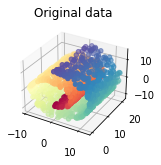

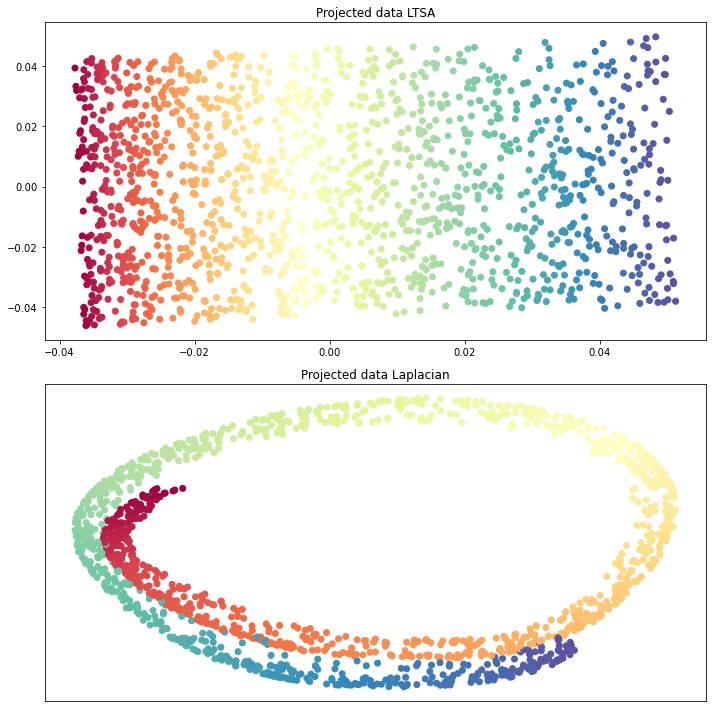

In [49]:
#Local Tangent Space Alignment
X_ltsa, x_er = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2,method = 'ltsa')

from sklearn.manifold import SpectralEmbedding
lapl = SpectralEmbedding(n_components=2)
X_lapl = lapl.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(211, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
fig.tight_layout()


fig, ax = plt.subplots(2, 1,figsize=(10,10))
#ax = fig.add_subplot(212)
ax[0].scatter(X_ltsa[:, 0], X_ltsa[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis("tight")
plt.xticks([]), plt.yticks([])
ax[0].set_title("Projected data LTSA")

#ax = fig.add_subplot(222)
ax[1].scatter(X_lapl[:, 0], X_lapl[:, 1],c=color, cmap=plt.cm.Spectral)
plt.axis("tight")
plt.xticks([]), plt.yticks([])
ax[1].set_title("Projected data Laplacian")
fig.tight_layout()